In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch
import random
import os
from torchvision import datasets
import torch.utils.data as data
from sklearn.preprocessing import Normalizer
from sklearn.metrics import f1_score
from PIL import Image
from rdkit import Chem
from rdkit.Chem import AllChem

df_data = pd.read_csv('/egr/research-aidd/menghan1/AnchorDrug/data/level5_beta_trt_cp_24h_10uM.csv')
use_HQ_sample_id = pd.read_csv(f'/egr/research-aidd/menghan1/AnchorDrug/HQ_LINCS_retrain/revise_use_LINCS_HQ_data_pretrain_sample_id.csv')['x']
df_res = df_data[df_data['sig_id'].isin(use_HQ_sample_id)]
cellline_map = pd.read_csv('/egr/research-aidd/menghan1/AnchorDrug/data/CellLineEncode/use_training_cell_line_expression_features_128_encoded_20240111.csv')
cell_list = cellline_map['Unnamed: 0'].to_list()
df_res = df_res[df_res['cell_iname'].isin(cell_list)]

print(len(df_res))
pool_drug = set(df_res.SMILES.to_list())

for cell in ['MCF7', 'PC3', 'A549']:
        use_HQ_sample_id = pd.read_csv(f'/egr/research-aidd/menghan1/AnchorDrug/HQ_LINCS_retrain/revise_use_LINCS_HQ_data_target_cellline_{cell}_sample_id.csv')['x']
        # tmp = pd.read_csv('/egr/research-aidd/menghan1/AnchorDrug/HQ_LINCS_retrain/GPS_predictable_genes.csv')
        # genelist = tmp.x.to_list()
        
        
        df_target = df_data[df_data['sig_id'].isin(use_HQ_sample_id)]
        # median = df_target[['SMILES']+genelist].groupby(by='SMILES').median().reset_index()
        # median['cellline'] = cell
        # df_target = median
        df_target = df_target.rename(columns={'SMILES': 'smiles'})
        # for g in genelist:
        #     df_target[g] = df_target[g].apply(lambda x: (x > 1.5) * 1 + (x >= -1.5) * 1)

        Drugs = df_target['smiles'].to_list()
        tmp = pd.read_csv(f'/egr/research-aidd/menghan1/AnchorDrug/HQ_LINCS_retrain/{cell}_internal_val2_data.csv')
        valDrugs = tmp.SMILES.to_list()
        trainDrugs = set(Drugs)-set(valDrugs)
        print(len(Drugs), len(list(trainDrugs)), len(valDrugs))
        pool_drug = pool_drug.intersection(trainDrugs)
        print(len(list(pool_drug)))

        # df_train = df_target[df_target['smiles'].isin(trainDrugs)]
        # df_val = df_target[df_target['smiles'].isin(valDrugs)]


7258
2084 1203 134
810
2164 1272 141
497
1562 842 94
279


In [22]:
import pickle
with open('HQ_pool_drug.pkl', 'wb') as f:
    pickle.dump(list(pool_drug), f)

In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch
import random
import os, pickle
from torchvision import datasets
import torch.utils.data as data
from sklearn.preprocessing import Normalizer
from sklearn.metrics import f1_score
from PIL import Image
from rdkit import Chem
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt

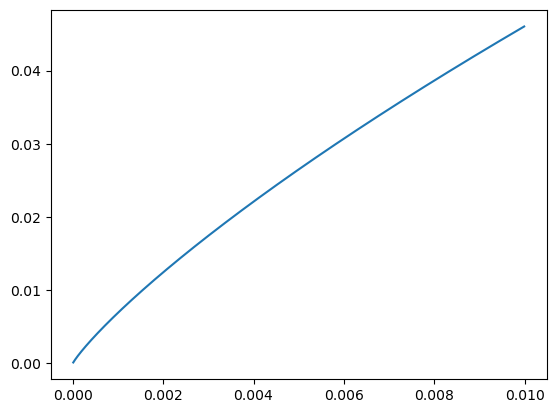

In [12]:
x = [i for i in np.arange(0.00001, 0.01, 0.00001)]
y = [-i*torch.log(torch.tensor(i+10e-7)) for i in x]
plt.plot(x, y)